# Budget 2024 Sentiment Analysis and Text Summarization
### Subarna Sutradhar 21052288
## Web Scaping the Budget


In [23]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.livemint.com/economy/budget-2024-25-key-highlights-live-updates-interim-budget-agriculture-infra-fiscal-deficit-nirmala-sitharaman-11706695416199.html'

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')
text = soup.get_text()

In [4]:
text

'\n\n\n\n          \n\n \n\n\n\n\nBudget 2024 Key Highlights: India to cut aid to the Maldives by 22% | Mint\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  \n\n\n\n\n\n  \n\n\n\n\n \n\n\n\n\n\n\n\n          Explore    Sign in e-paper Subscribe Friday, 9 February 2024              Stocks       Mutual Funds       News                     Home Budget-2024 News Markets Premium Money Mutual Fund Industry Companies Technology Web Stories Opinion Videos      All Companies  Technology Markets Money Mutual Funds Insurance Auto  Industry  Personal Finance        Hello User  Sign in      Sign Out     My Account My Account Subscribe  My Watchlist   Newsletters   Notifications      My Reads   For You   View Less -  View More +   Data Insights   Market Dashboard   Bullion      Gold   Silver     Fuel      Petrol   Diesel     Commodities      Gold   GoldM   Aluminum   Menthaoil   Silver   SilverMIC   GoldPetal   Natural Gas   Copper   Zinc   SilverM   CrudeOil   GoldGinuea   Lead    

### Text PreProcessing

In [5]:
import re

In [6]:
text = re.sub(r'[^\w\s.]','',text)
text = re.sub(r'\n',' ',text)
text = re.sub(r'\s+',' ',text)

In [7]:
text

sentences = text.split('.')

sentences

[' Budget 2024 Key Highlights India to cut aid to the Maldives by 22 Mint Explore Sign in epaper Subscribe Friday 9 February 2024 Stocks Mutual Funds News Home Budget2024 News Markets Premium Money Mutual Fund Industry Companies Technology Web Stories Opinion Videos All Companies Technology Markets Money Mutual Funds Insurance Auto Industry Personal Finance Hello User Sign in Sign Out My Account My Account Subscribe My Watchlist Newsletters Notifications My Reads For You View Less View More Data Insights Market Dashboard Bullion Gold Silver Fuel Petrol Diesel Commodities Gold GoldM Aluminum Menthaoil Silver SilverMIC GoldPetal Natural Gas Copper Zinc SilverM CrudeOil GoldGinuea Lead CryptoCurrencies View Less View More Top Sections News India News World News Economy Companies IPO News Startups Company Results Top Company Leader Money Personal Finance QA Opinion Markets Stock Markets Commodity News Mark To Market IPO News Live Blog Elections 2024 Assembly Elections 2023 Industry Banking

In [8]:
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

In [9]:
sentences

['Budget 2024 Key Highlights India to cut aid to the Maldives by 22 Mint Explore Sign in epaper Subscribe Friday 9 February 2024 Stocks Mutual Funds News Home Budget2024 News Markets Premium Money Mutual Fund Industry Companies Technology Web Stories Opinion Videos All Companies Technology Markets Money Mutual Funds Insurance Auto Industry Personal Finance Hello User Sign in Sign Out My Account My Account Subscribe My Watchlist Newsletters Notifications My Reads For You View Less View More Data Insights Market Dashboard Bullion Gold Silver Fuel Petrol Diesel Commodities Gold GoldM Aluminum Menthaoil Silver SilverMIC GoldPetal Natural Gas Copper Zinc SilverM CrudeOil GoldGinuea Lead CryptoCurrencies View Less View More Top Sections News India News World News Economy Companies IPO News Startups Company Results Top Company Leader Money Personal Finance QA Opinion Markets Stock Markets Commodity News Mark To Market IPO News Live Blog Elections 2024 Assembly Elections 2023 Industry Banking 

## using the model(FinBert)

In [10]:
from transformers import BertTokenizer,BertForSequenceClassification

/home/subarna/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
from transformers import pipeline

In [12]:
finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)

In [13]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')

In [14]:
def createSentiment(sen):
    nlp = pipeline("sentiment-analysis", model=finbert, tokenizer=tokenizer)
    results = nlp(sen)
    return results

In [15]:
#truncating the sentences as in FinBert the maximum input sentences tokens is 512 tokens

In [16]:
truncatedSentences = [sentence[:512] for sentence in sentences]
sentimentResult = createSentiment(truncatedSentences)


In [17]:
#counting no of positive and negative news
pos = 0
neg = 0

In [19]:
for ind, result in enumerate(sentimentResult):
    print(f"Sentence {ind + 1}: {sentences[ind]}")
    print("Sentiment:", result)
    if result['label'] == 'Positive':
        pos += 1
    elif result['label'] == 'Negative':
        neg += 1
    print()

Sentence 1: Budget 2024 Key Highlights India to cut aid to the Maldives by 22 Mint Explore Sign in epaper Subscribe Friday 9 February 2024 Stocks Mutual Funds News Home Budget2024 News Markets Premium Money Mutual Fund Industry Companies Technology Web Stories Opinion Videos All Companies Technology Markets Money Mutual Funds Insurance Auto Industry Personal Finance Hello User Sign in Sign Out My Account My Account Subscribe My Watchlist Newsletters Notifications My Reads For You View Less View More Data Insights Market Dashboard Bullion Gold Silver Fuel Petrol Diesel Commodities Gold GoldM Aluminum Menthaoil Silver SilverMIC GoldPetal Natural Gas Copper Zinc SilverM CrudeOil GoldGinuea Lead CryptoCurrencies View Less View More Top Sections News India News World News Economy Companies IPO News Startups Company Results Top Company Leader Money Personal Finance QA Opinion Markets Stock Markets Commodity News Mark To Market IPO News Live Blog Elections 2024 Assembly Elections 2023 Industr

### No of Positive and Negative News

In [20]:
print("No. of Positive News is: ",pos)
print("No. of Negative News is: ",neg)

No. of Positive News is:  83
No. of Negative News is:  14


## Text Summarization using BART

In [21]:
#summarization
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

In [22]:
print(summarizer(text[:1024], max_length=130, min_length=30, do_sample=False))

[{'summary_text': 'Budget 2024 Key Highlights India to cut aid to the Maldives by 22 Mint Explore Sign in epaper Subscribe Friday 9 February 2024 Stocks Mutual Funds News Home Budget2024 News Markets Premium Money Mutual Fund Industry Companies Technology Web Stories Opinion Videos All Companies Technology Markets Money Mutual Funds Insurance Auto Industry Personal Finance Hello User Sign in Sign Out My Account My Account Subscribe My Watchlist Newsletters Notifications My Reads For You View Less View More Data Insights Market Dashboard Bullion Gold Silver Fuel Petrol Diesel Commodities Gold GoldM Aluminum Menthaoil Silver SilverMIC GoldPetal Natural Gas Copper Zinc SilverM CrudeOil'}]


### Visualizing

In [24]:
import matplotlib.pyplot as plt

In [25]:
label = ['Positive','Negative']
count = [pos,neg]

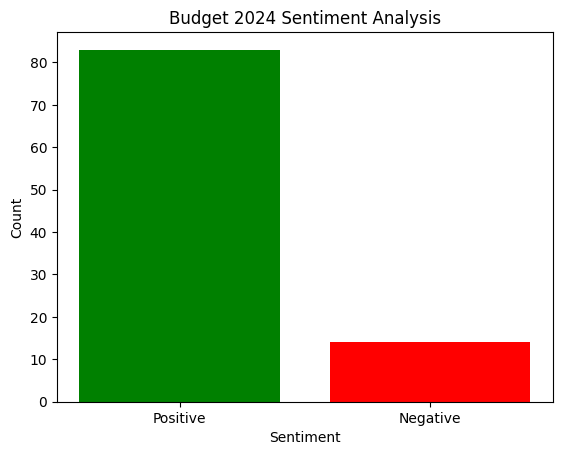

In [38]:
plt.bar(label,count, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Budget 2024 Sentiment Analysis')
plt.show()